# Community Detection

In [1]:
import numpy as np
import networkx as nx
import scipy.spatial as spt
import scipy.io
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import operator

In [2]:
G = nx.karate_club_graph()
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

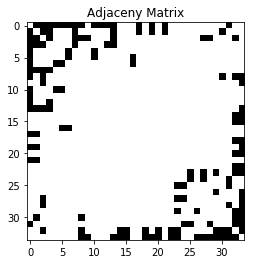

In [3]:
plt.imshow(A, cmap='Greys')
plt.title("Adjaceny Matrix")
plt.show()

#### The adjaceny matrix is a sparse matrix, i.e., the graph is not very dense.

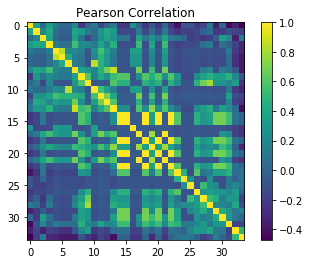

In [4]:
p = np.corrcoef(A)
plt.imshow(p)
plt.title("Pearson Correlation")
plt.colorbar()
plt.show()

#### Pearson correlation coefficient tells us about how many common neighbours two nodes have as compared to the same in a random graph.

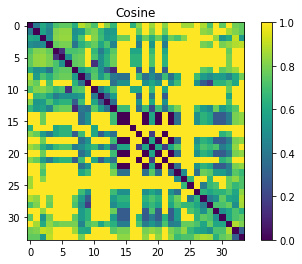

In [5]:
dVec = spt.distance.pdist(A, metric='cosine')
D = spt.distance.squareform(dVec)
plt.title("Cosine")
plt.imshow(D)
plt.colorbar()

#### Note : The cosine similarity for scipy spatial distance library is defined as `1 - a.b`. Hence, here, cosine similarity of a node with itself is 0. Nodes that are more similar have smaller cosine similarity in above matrix.  
#### If nodes share lots of neighbors, should be part of same cluster. For eg. nodes 14 and 15, 32 and 33 should be in the same cluster (which is true, as we see later on)

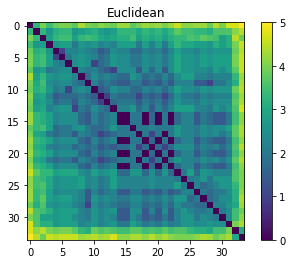

In [6]:
dVec = spt.distance.pdist(A, metric='euclidean')
D = spt.distance.squareform(dVec)
plt.title("Euclidean")
plt.imshow(D)
plt.colorbar()

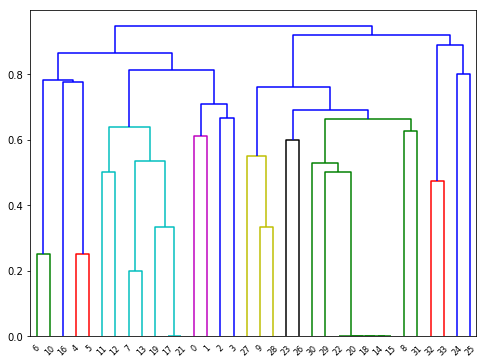

In [7]:
D = pdist(A, metric='jaccard')
hc = hierarchy.average(D)
plt.figure(figsize = (8,6))
Z = hierarchy.dendrogram(hc)

[1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2]


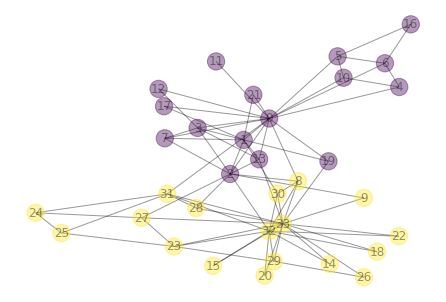

In [8]:
comm = hierarchy.fcluster(hc, 2, criterion='maxclust')
pos = nx.spring_layout(G, seed=0)
nx.draw(G, pos, node_color=comm, alpha=0.4, with_labels=True)
print(comm)

In [9]:
import community
from networkx.algorithms.community.centrality import girvan_newman

In [10]:
G = nx.karate_club_graph()

In [11]:
nx.modularity_matrix(G)

matrix([[-1.64102564,  0.07692308, -0.02564103, ...,  0.38461538,
         -1.23076923, -1.74358974],
        [ 0.07692308, -0.51923077,  0.42307692, ..., -0.34615385,
         -0.69230769, -0.98076923],
        [-0.02564103,  0.42307692, -0.64102564, ..., -0.38461538,
          0.23076923, -1.08974359],
        ...,
        [ 0.38461538, -0.34615385, -0.38461538, ..., -0.23076923,
          0.53846154,  0.34615385],
        [-1.23076923, -0.69230769,  0.23076923, ...,  0.53846154,
         -0.92307692, -0.30769231],
        [-1.74358974, -0.98076923, -1.08974359, ...,  0.34615385,
         -0.30769231, -1.8525641 ]])

# Communities using Girvan Newman

In [12]:
def get_next_split():
    communities = tuple(sorted(c) for c in next(comp))
    com = 0
    thisdict = {}
    for c in communities:
        list_ = sorted(c)
        for i in range(len(list_)):
            if list_[i] in thisdict:
                print("already found")
            else:
                thisdict.update({list_[i] : com})
            i+=1
        com+=1
    values_girvan = [thisdict.get(node) for node in G.nodes()]
    mod_girv = community.modularity(thisdict, G)
    
    dict_nodes_girvan = {}
    for each_item in thisdict.items():
        community_num = each_item[1]
        community_node = each_item[0]
    #     print(each_item, community_node, community_num)
        if(community_num in dict_nodes_girvan):
            value=dict_nodes_girvan.get(community_num), (community_node)
    #         print(value)
            dict_nodes_girvan.update({community_num: value})
        else:
            dict_nodes_girvan.update({community_num: community_node})
    print("\n")
    print(dict_nodes_girvan)
    
    G_comm_girvan = nx.Graph()
    G_comm_girvan.add_nodes_from(dict_nodes_girvan)
    print("\nNumber of comms =", len(G_comm_girvan.nodes()))
    mod_girv = community.modularity(thisdict, G)
    print("Modularity =", mod_girv)
    return values_girvan, mod_girv
    

In [13]:
comp = girvan_newman(G)
iterations = 10
values_dict = dict.fromkeys(range(iterations+1))
values_dict[0] = [0]*len(G.nodes())
modularity = dict.fromkeys(range(iterations+1))
modularity[0] = 0
for i in range(1, iterations):
    values_dict[i], modularity[i] = get_next_split()



{0: ((((((((((((((0, 1), 3), 4), 5), 6), 7), 10), 11), 12), 13), 16), 17), 19), 21), 1: ((((((((((((((((((2, 8), 9), 14), 15), 18), 20), 22), 23), 24), 25), 26), 27), 28), 29), 30), 31), 32), 33)}

Number of comms = 2
Modularity = 0.35996055226824464


{0: ((((((((((((((0, 1), 3), 4), 5), 6), 7), 10), 11), 12), 13), 16), 17), 19), 21), 1: (((((((((((((((((2, 8), 14), 15), 18), 20), 22), 23), 24), 25), 26), 27), 28), 29), 30), 31), 32), 33), 2: 9}

Number of comms = 3
Modularity = 0.34878369493754113


{0: (((((((((0, 1), 3), 7), 11), 12), 13), 17), 19), 21), 1: (((((((((((((((((2, 8), 14), 15), 18), 20), 22), 23), 24), 25), 26), 27), 28), 29), 30), 31), 32), 33), 2: ((((4, 5), 6), 10), 16), 3: 9}

Number of comms = 4
Modularity = 0.3632478632478633


{0: (((((((((0, 1), 3), 7), 11), 12), 13), 17), 19), 21), 1: (((((2, 24), 25), 27), 28), 31), 2: ((((4, 5), 6), 10), 16), 3: (((((((((((8, 14), 15), 18), 20), 22), 23), 26), 29), 30), 32), 33), 4: 9}

Number of comms = 5
Modularity = 0.4

In [14]:
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec

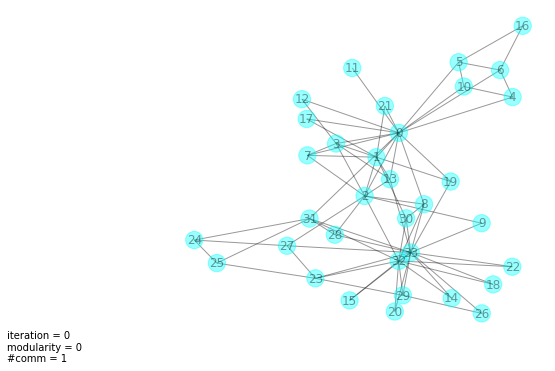

In [15]:
pos = nx.spring_layout(G, seed=0)
colors_dict = {0: 'cyan', 1:'r', 2:'g', 3:'y', 4:'b', 5:'k', 6:'m', 7:'orange', 8:'brown', 9:'lime', 10:'gold'}
def update(i):
    comm_colors = [colors_dict[i] for i in values_dict[i]]
    ax1.cla()
    graph = nx.draw(G, pos, node_color=comm_colors, alpha=0.4, with_labels=True, ax = ax1)
    sweep_text = ax1.text(-1.0, -1, '')
    sweep_text.set_text("iteration = " + str(i) + "\nmodularity = " + str(modularity[i]) + "\n#comm = " + str(max(values_dict[i])+1))
    return sweep_text, ax1

gs=GridSpec(1,2)
fig = plt.figure(figsize = (15, 6)) 
ax1 = fig.add_subplot(gs[0, 1])
graph = nx.draw(G, pos, node_color='cyan', alpha=0.4, with_labels=True, ax = ax1)
sweep_text = ax1.text(0.1, -1, '')
ani = animation.FuncAnimation(fig, update, frames = iterations)

ani.save("./animation_community.gif", writer='imagemagick', fps=0.4)

# NOVER method

In [39]:
def nover(G):
    nodes = list(G.nodes())
    A = nx.to_numpy_matrix(G, dtype=int)
    nover = {}

    for i in nodes:
        for j in nodes[i+1:]:
            if(A[i, j]):
                n1 = set(nx.neighbors(G, i))
                n2 = set(nx.neighbors(G, j))
                union = n1 | n2
                intersection = n1 & n2
                nover.update({(i, j) : len(intersection)/len(union)})
    minimum_val = min(nover.items(), key=operator.itemgetter(1))[1]
    edges_to_drop = [x for x in nover if nover[x]==minimum_val]
    if(len(edges_to_drop) == np.sum(A==1)/2):
        return []
    return edges_to_drop


In [40]:
G = nx.karate_club_graph()
G_orig = nx.karate_club_graph()
colors_dict = {0: 'cyan', 1:'r', 2:'g', 3:'y', 4:'b', 5:'k', 6:'m', 7:'orange', 8:'brown', 9:'lime', 10:'gold', 11:'pink', 12:'grey'}

values_dict = dict.fromkeys(range(4))
for iteration in range(4):
    edges_to_drop = nover(G)
    if(len(edges_to_drop)==0):
        break
    G.remove_edges_from(nover(G))
    components = list(nx.connected_components(G))
    color_dict = {}
    for i in range(len(components)):
        for node in components[i]:
            color_dict.update({node:i})
    values_dict[iteration] = color_dict


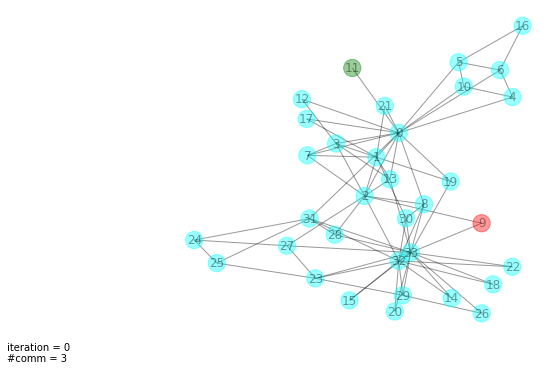

In [41]:
def update(i):
    comm_colors = [colors_dict[i] for i in values_dict[i].values()]
    ax1.cla()
    graph = nx.draw(G_orig, pos, node_color=comm_colors, alpha=0.4, with_labels=True, ax = ax1)
    sweep_text = ax1.text(-1.0, -1, '')
    sweep_text.set_text("iteration = " + str(i)+ "\n#comm = " + str(max(values_dict[i].values())+1))
    return sweep_text, ax1

gs=GridSpec(1,2)
fig = plt.figure(figsize = (15, 6)) 
ax1 = fig.add_subplot(gs[0, 1])
graph = nx.draw(G_orig, pos, node_color='cyan', alpha=0.4, with_labels=True, ax = ax1)
sweep_text = ax1.text(0.1, -1, '')
ani = animation.FuncAnimation(fig, update, frames = 4)

ani.save("./nover_animation_community.gif", writer='imagemagick', fps=0.4)